Instrucciones:


In [12]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

1. Calcula las siguientes estadísticas descriptivas para las variables numéricas:

- Media
- Mediana
- Desviación estándar
- Mínimo
- Máximo


In [48]:
df = pd.read_csv("world_data_full_apply_nulos.csv", index_col=0)
df.head()

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.230,323.0,32.49,93.0,Kabul,8.672,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe
2,Algeria,18.0,DZ,17.4,NaN,317.0,24.28,213.0,Algiers,150.006,151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,NaN,41.2,37.2,66.1,11.70,NaN,28.033886,1.659626,Africa
3,Andorra,164.0,AD,40.0,468.000,NaN,7.20,376.0,Andorra la Vella,469.000,NaN,NaN,EUR,1.27,34.0,1.51,3.154058e+09,106.4,NaN,2.7,Andorra la Vella,NaN,NaN,6.63,Catalan,36.4,3.33,77.142,NaN,NaN,NaN,NaN,67.873,42.506285,1.521801,Europe
4,Angola,26.0,AO,47.5,NaN,117.0,40.73,244.0,Luanda,34.693,261.73,17.1,AOA,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,Luanda,60.8,241.0,0.71,Portuguese,33.4,0.21,NaN,77.5,9.2,49.1,6.89,NaN,-11.202692,17.873887,Africa


In [16]:
df_num = df.select_dtypes(include = np.number)
df_num

,density,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,co2-emissions,cpi,cpi_change,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,life_expectancy,maternal_mortality_ratio,minimum_wage,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude
0,60.0,58.1,652.230,323.0,32.49,93.0,8.672,149.90,2.3,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,64.5,638.0,0.43,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953
1,105.0,43.1,28.748,9.0,11.78,355.0,4.536,119.05,1.4,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,78.5,15.0,1.12,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331
2,18.0,17.4,NaN,317.0,24.28,213.0,150.006,151.36,2.0,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,76.7,112.0,0.95,28.1,1.72,NaN,41.2,37.2,66.1,11.70,NaN,28.033886,1.659626
3,164.0,40.0,468.000,NaN,7.20,376.0,469.000,NaN,NaN,1.27,34.0,1.51,3.154058e+09,106.4,NaN,2.7,NaN,NaN,6.63,36.4,3.33,77.142,NaN,NaN,NaN,NaN,67.873,42.506285,1.521801
4,26.0,47.5,NaN,117.0,40.73,244.0,34.693,261.73,17.1,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,60.8,241.0,0.71,33.4,0.21,NaN,77.5,9.2,49.1,6.89,NaN,-11.202692,17.873887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,32.0,24.5,912.050,343.0,17.88,58.0,164.175,NaN,254.9,2.27,52.7,0.00,4.823593e+11,97.2,79.3,21.4,72.1,125.0,0.01,45.8,1.92,NaN,59.7,NaN,73.3,8.80,NaN,6.423750,-66.589730
191,314.0,39.3,331.210,522.0,16.75,84.0,192.668,163.52,2.8,2.05,48.1,0.80,2.619212e+11,110.6,28.5,16.5,75.3,43.0,0.73,43.5,0.82,NaN,77.4,19.1,37.6,2.01,NaN,14.058324,108.277199
192,56.0,44.6,527.968,40.0,30.45,967.0,10.609,157.58,8.1,3.79,1.0,0.92,2.691440e+10,93.6,10.2,42.9,66.1,164.0,NaN,81.0,0.31,NaN,38.0,NaN,26.6,12.91,NaN,15.552727,48.516388
193,25.0,32.1,752.618,16.0,36.19,260.0,5.141,212.31,9.2,4.63,65.2,1.40,2.306472e+10,98.7,4.1,40.4,63.5,213.0,0.24,27.5,1.19,NaN,74.6,16.2,15.6,11.43,NaN,-13.133897,27.849332


In [30]:
df_num.describe()

,density,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,co2-emissions,cpi,cpi_change,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,life_expectancy,maternal_mortality_ratio,minimum_wage,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude
count,195.000000,188.000000,165.000000,166.000000,189.000000,194.000000,183.000000,175.000000,179.000000,188.000000,188.000000,175.000000,1.930000e+02,188.000000,183.000000,189.000000,187.000000,181.000000,150.000000,188.000000,188.000000,39.000000,176.000000,169.000000,183.000000,176.000000,45.000000,194.000000,194.000000
mean,134.504533,39.117553,255.212661,103.783133,20.214974,360.546392,125.915470,144.193600,6.722346,2.698138,32.015426,1.002457,4.772959e+11,102.470213,37.963388,21.332804,72.279679,160.392265,2.194133,32.637234,1.839840,333.542718,62.738068,16.573964,40.822404,6.886364,279.461044,19.092351,20.232434
std,157.306774,21.783052,258.385008,167.158031,9.945774,323.236419,181.794917,54.783998,24.450414,1.282267,23.791331,0.368858,2.172173e+12,13.151607,29.261022,19.548058,7.483661,233.502024,2.970796,19.172697,1.684261,296.467504,10.502907,6.961632,20.557662,5.079216,283.322352,23.961779,66.716110
min,1.265000,0.600000,0.000000,0.000000,5.900000,1.000000,1.016000,99.030000,-4.300000,0.980000,0.000000,0.000000,4.727146e+07,23.400000,0.800000,1.400000,52.800000,2.000000,0.010000,0.200000,0.010000,10.084000,38.000000,0.000000,8.000000,0.090000,5.464000,-40.900557,-175.198242
25%,26.168500,21.700000,41.277000,10.250000,11.300000,82.500000,7.600000,113.670000,1.000000,1.705000,11.000000,0.755000,8.454620e+09,98.950000,12.150000,6.000000,67.000000,13.000000,0.402500,17.450000,0.332500,87.130000,56.150000,11.700000,30.600000,3.395000,40.765000,4.544175,-7.941496
50%,83.000000,39.600000,148.460000,28.500000,17.950000,255.500000,34.477000,124.740000,2.300000,2.245000,32.000000,0.980000,3.438723e+10,102.550000,31.200000,14.000000,73.200000,53.000000,1.045000,30.700000,1.460000,215.056000,62.450000,16.300000,37.200000,5.360000,179.039000,17.273849,20.972652
75%,165.500000,55.375000,430.000000,128.250000,28.750000,506.750000,185.030500,155.925000,4.250000,3.597500,48.175000,1.240000,2.340940e+11,108.025000,63.150000,32.700000,77.500000,186.000000,2.447500,43.975000,2.935000,556.162500,69.500000,21.100000,48.000000,9.490000,417.765000,40.124603,48.281523
max,847.000000,82.600000,964.000000,936.000000,46.080000,1876.000000,727.973000,550.930000,254.900000,6.910000,98.300000,2.000000,2.142770e+13,142.500000,136.600000,84.500000,85.400000,1150.000000,13.590000,81.600000,8.420000,973.560000,86.800000,37.200000,219.600000,28.180000,984.812000,64.963051,178.065032


In [18]:
round(df['density'].mean(), 3)

134.505

In [33]:
#media
for n in df_num:
    print(f"{n} --> {round(df[n].mean(), 3)}")



density --> 134.505
agricultural_land --> 39.118
land_area --> 255.213
armed_forces_size --> 103.783
birth_rate --> 20.215
calling_code --> 360.546
co2-emissions --> 125.915
cpi --> 144.194
cpi_change --> 6.722
fertility_rate --> 2.698
forested_area --> 32.015
gasoline_price --> 1.002
gdp --> 477295901399.539
gross_primary_education_enrollment --> 102.47
gross_tertiary_education_enrollment --> 37.963
infant_mortality --> 21.333
life_expectancy --> 72.28
maternal_mortality_ratio --> 160.392
minimum_wage --> 2.194
out_of_pocket_health_expenditure --> 32.637
physicians_per_thousand --> 1.84
population --> 333.543
population_labor_force_participation --> 62.738
tax_revenue --> 16.574
total_tax_rate --> 40.822
unemployment_rate --> 6.886
urban_population --> 279.461
latitude --> 19.092
longitude --> 20.232


In [34]:
#mediana
for n in df_num:
    print(f"{n} --> {round(df[n].median(), 3)}")

density --> 83.0
agricultural_land --> 39.6
land_area --> 148.46
armed_forces_size --> 28.5
birth_rate --> 17.95
calling_code --> 255.5
co2-emissions --> 34.477
cpi --> 124.74
cpi_change --> 2.3
fertility_rate --> 2.245
forested_area --> 32.0
gasoline_price --> 0.98
gdp --> 34387229486.0
gross_primary_education_enrollment --> 102.55
gross_tertiary_education_enrollment --> 31.2
infant_mortality --> 14.0
life_expectancy --> 73.2
maternal_mortality_ratio --> 53.0
minimum_wage --> 1.045
out_of_pocket_health_expenditure --> 30.7
physicians_per_thousand --> 1.46
population --> 215.056
population_labor_force_participation --> 62.45
tax_revenue --> 16.3
total_tax_rate --> 37.2
unemployment_rate --> 5.36
urban_population --> 179.039
latitude --> 17.274
longitude --> 20.973


In [35]:
#desviación estándard
for n in df_num:
    print(f"{n} --> {round(df[n].std(), 3)}")

density --> 157.307
agricultural_land --> 21.783
land_area --> 258.385
armed_forces_size --> 167.158
birth_rate --> 9.946
calling_code --> 323.236
co2-emissions --> 181.795
cpi --> 54.784
cpi_change --> 24.45
fertility_rate --> 1.282
forested_area --> 23.791
gasoline_price --> 0.369
gdp --> 2172173359474.053
gross_primary_education_enrollment --> 13.152
gross_tertiary_education_enrollment --> 29.261
infant_mortality --> 19.548
life_expectancy --> 7.484
maternal_mortality_ratio --> 233.502
minimum_wage --> 2.971
out_of_pocket_health_expenditure --> 19.173
physicians_per_thousand --> 1.684
population --> 296.468
population_labor_force_participation --> 10.503
tax_revenue --> 6.962
total_tax_rate --> 20.558
unemployment_rate --> 5.079
urban_population --> 283.322
latitude --> 23.962
longitude --> 66.716


In [36]:
#desviación estándard
for n in df_num:
    print(f"{n} --> {round(df[n].min(), 3)}")

density --> 1.265
agricultural_land --> 0.6
land_area --> 0.0
armed_forces_size --> 0.0
birth_rate --> 5.9
calling_code --> 1.0
co2-emissions --> 1.016
cpi --> 99.03
cpi_change --> -4.3
fertility_rate --> 0.98
forested_area --> 0.0
gasoline_price --> 0.0
gdp --> 47271463.0
gross_primary_education_enrollment --> 23.4
gross_tertiary_education_enrollment --> 0.8
infant_mortality --> 1.4
life_expectancy --> 52.8
maternal_mortality_ratio --> 2.0
minimum_wage --> 0.01
out_of_pocket_health_expenditure --> 0.2
physicians_per_thousand --> 0.01
population --> 10.084
population_labor_force_participation --> 38.0
tax_revenue --> 0.0
total_tax_rate --> 8.0
unemployment_rate --> 0.09
urban_population --> 5.464
latitude --> -40.901
longitude --> -175.198


In [64]:
df.sort_values(by="density", ascending=False)

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
133,Palestinian National Authority,847.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arabic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.952162,35.233154,Asia
111,Federated States of Micronesia,784.000,FM,31.4,702.00,NaN,22.82,691.0,Palikir,143.000,112.10,0.5,USD,3.05,91.9,NaN,4.019323e+08,97.2,14.1,25.6,Palikir,67.8,88.0,NaN,English,2.5,0.18,113.815,NaN,25.2,60.5,NaN,25.963,7.425554,150.550812,Oceania
14,Barbados,668.000,BB,23.3,430.00,1.0,10.65,1.0,Bridgetown,1.276,134.09,4.1,BBD,1.62,14.7,1.81,5.209000e+09,99.4,65.4,11.3,Bridgetown,79.1,27.0,3.13,English,45.2,2.48,287.025,65.2,27.5,35.6,10.33,89.431,13.193887,-59.543198,Central America
94,Lebanon,667.000,LB,64.3,10.40,80.0,17.55,961.0,Beirut,24.796,130.02,3.0,LBP,2.09,13.4,0.74,5.336704e+10,95.1,26.3,6.4,"Tripoli, Lebanon",78.9,29.0,2.15,Arabic,32.1,2.10,NaN,47.0,15.3,32.2,6.23,NaN,33.854721,35.862285,Asia
109,Mauritius,626.000,MU,42.4,2.04,3.0,10.20,230.0,Port Louis,4.349,129.91,0.4,MUR,1.41,19.0,1.12,1.418044e+10,101.1,40.6,13.6,Port Louis,74.4,61.0,0.38,French,50.7,2.53,NaN,58.3,19.1,22.2,6.67,515.980,-20.348404,57.552152,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,Vatican City,2.003,NaN,NaN,0.00,NaN,NaN,379.0,Vatican City,NaN,NaN,NaN,EUR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Italian,NaN,NaN,836.000,NaN,NaN,NaN,NaN,NaN,41.902916,12.453389,Europe
114,Mongolia,2.000,MN,71.5,NaN,18.0,24.13,976.0,Ulaanbaatar,25.368,195.76,7.3,MNT,2.90,8.0,0.72,1.385285e+10,104.0,65.6,14.0,Ulaanbaatar,69.7,45.0,0.65,Mongolian,39.3,2.86,NaN,59.7,16.8,25.7,6.01,NaN,46.862496,103.846656,Asia
104,Maldives,1.802,MV,26.3,298.00,5.0,14.20,960.0,Mal�,1.445,99.70,0.2,NaN,1.87,3.3,1.63,5.729248e+09,97.1,31.2,7.4,Mal�,78.6,53.0,NaN,Divehi,16.4,4.56,530.953,69.8,19.5,30.2,6.14,213.645,3.202778,73.220680,Asia
106,Malta,1.380,MT,32.4,316.00,2.0,9.20,356.0,Valletta,1.342,113.45,1.6,EUR,1.23,1.1,1.36,1.478616e+10,105.0,54.3,6.1,Birkirkara,82.3,6.0,5.07,Maltese,37.1,2.86,502.653,56.5,26.2,44.0,3.47,475.902,35.937496,14.375416,Europe


In [65]:
df.sort_values(by="density", ascending=True)

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
13,Bangladesh,1.265,BD,70.6,148.46,221.0,18.18,880.0,Dhaka,84.246,179.68,5.6,BDT,2.04,11.0,1.12,3.025713e+11,116.5,20.6,25.1,Dhaka,72.3,173.0,0.51,Bengali,71.8,0.58,NaN,59.0,8.8,33.4,4.19,NaN,23.684994,90.356331,Asia
106,Malta,1.380,MT,32.4,316.00,2.0,9.20,356.0,Valletta,1.342,113.45,1.6,EUR,1.23,1.1,1.36,1.478616e+10,105.0,54.3,6.1,Birkirkara,82.3,6.0,5.07,Maltese,37.1,2.86,502.653,56.5,26.2,44.0,3.47,475.902,35.937496,14.375416,Europe
104,Maldives,1.802,MV,26.3,298.00,5.0,14.20,960.0,Mal�,1.445,99.70,0.2,NaN,1.87,3.3,1.63,5.729248e+09,97.1,31.2,7.4,Mal�,78.6,53.0,NaN,Divehi,16.4,4.56,530.953,69.8,19.5,30.2,6.14,213.645,3.202778,73.220680,Asia
114,Mongolia,2.000,MN,71.5,NaN,18.0,24.13,976.0,Ulaanbaatar,25.368,195.76,7.3,MNT,2.90,8.0,0.72,1.385285e+10,104.0,65.6,14.0,Ulaanbaatar,69.7,45.0,0.65,Mongolian,39.3,2.86,NaN,59.7,16.8,25.7,6.01,NaN,46.862496,103.846656,Asia
73,Vatican City,2.003,NaN,NaN,0.00,NaN,NaN,379.0,Vatican City,NaN,NaN,NaN,EUR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Italian,NaN,NaN,836.000,NaN,NaN,NaN,NaN,NaN,41.902916,12.453389,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,Mauritius,626.000,MU,42.4,2.04,3.0,10.20,230.0,Port Louis,4.349,129.91,0.4,MUR,1.41,19.0,1.12,1.418044e+10,101.1,40.6,13.6,Port Louis,74.4,61.0,0.38,French,50.7,2.53,NaN,58.3,19.1,22.2,6.67,515.980,-20.348404,57.552152,Africa
94,Lebanon,667.000,LB,64.3,10.40,80.0,17.55,961.0,Beirut,24.796,130.02,3.0,LBP,2.09,13.4,0.74,5.336704e+10,95.1,26.3,6.4,"Tripoli, Lebanon",78.9,29.0,2.15,Arabic,32.1,2.10,NaN,47.0,15.3,32.2,6.23,NaN,33.854721,35.862285,Asia
14,Barbados,668.000,BB,23.3,430.00,1.0,10.65,1.0,Bridgetown,1.276,134.09,4.1,BBD,1.62,14.7,1.81,5.209000e+09,99.4,65.4,11.3,Bridgetown,79.1,27.0,3.13,English,45.2,2.48,287.025,65.2,27.5,35.6,10.33,89.431,13.193887,-59.543198,Central America
111,Federated States of Micronesia,784.000,FM,31.4,702.00,NaN,22.82,691.0,Palikir,143.000,112.10,0.5,USD,3.05,91.9,NaN,4.019323e+08,97.2,14.1,25.6,Palikir,67.8,88.0,NaN,English,2.5,0.18,113.815,NaN,25.2,60.5,NaN,25.963,7.425554,150.550812,Oceania


In [56]:
#desviación estándard
for n in df_num:
    print(f"{n} --> {round(df[n].max(), 3)}")



density --> 847.0
agricultural_land --> 82.6
land_area --> 964.0
armed_forces_size --> 936.0
birth_rate --> 46.08
calling_code --> 1876.0
co2-emissions --> 727.973
cpi --> 550.93
cpi_change --> 254.9
fertility_rate --> 6.91
forested_area --> 98.3
gasoline_price --> 2.0
gdp --> 21427700000000.0
gross_primary_education_enrollment --> 142.5
gross_tertiary_education_enrollment --> 136.6
infant_mortality --> 84.5
life_expectancy --> 85.4
maternal_mortality_ratio --> 1150.0
minimum_wage --> 13.59
out_of_pocket_health_expenditure --> 81.6
physicians_per_thousand --> 8.42
population --> 973.56
population_labor_force_participation --> 86.8
tax_revenue --> 37.2
total_tax_rate --> 219.6
unemployment_rate --> 28.18
urban_population --> 984.812
latitude --> 64.963
longitude --> 178.065


2. Identifica el país con la mayor densidad de población y el país con la menor población en el conjunto de datos.

In [ ]:
df_densidad = df.groupby("country")["density"].max()
df_densidad

country
Afghanistan     60.0
Albania        105.0
Algeria         18.0
Andorra        164.0
Angola          26.0
               ...  
Venezuela       32.0
Vietnam        314.0
Yemen           56.0
Zambia          25.0
Zimbabwe        38.0
Name: density, Length: 195, dtype: float64

In [45]:
pais_max_densidad = df_densidad.idxmax()
pais_max_densidad

'Palestinian National Authority'

In [54]:
pais_min_densidad = df_densidad.idxmin()
pais_min_densidad

'Bangladesh'

3. Calcula la tasa promedio de natalidad (birth_rate) para todos los países en el conjunto de datos.

In [67]:
df["birth_rate"].mean()

20.214973544973546

4. Realiza un análisis de la mortalidad infantil (infant_mortality) y clasifica los países en tres categorías: baja, moderada y alta mortalidad infantil.

<Axes: xlabel='infant_mortality', ylabel='Count'>

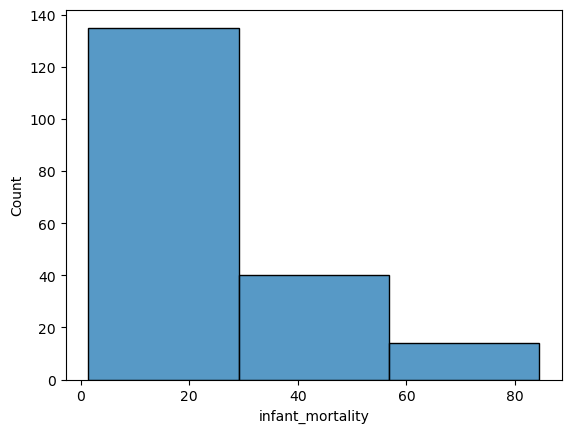

In [70]:
sns.histplot(data=df, x="infant_mortality", bins=3)


5. Calcula la correlación entre las variables de "fertility_rate" y "life_expectancy". Interpreta la relación entre estas dos variables. ¿Qué tipo de correlación hay? Explica la razón de esta relación